In [1]:
import pandas as pd
import numpy as np


     

In [2]:
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")


     

In [3]:
print(salary_train.shape)
salary_train.sample(1)


(30161, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
13246,36,Private,Prof-school,15,Never-married,Exec-managerial,Not-in-family,White,Male,27828,0,50,United-States,>50K


In [4]:
print(salary_train.workclass.value_counts())
print(salary_train.age.value_counts())
print(salary_train.education.value_counts())
print(salary_train.maritalstatus.value_counts())
print(salary_train.occupation.value_counts())
print(salary_train.relationship.value_counts())
print(salary_train.race.value_counts())
print(salary_train.sex.value_counts())
print(salary_train.native.value_counts())
print(salary_train.Salary.value_counts())



 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: i

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt



In [6]:
salary_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
salary_train.duplicated().sum()


3258

In [8]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
salary_train.drop_duplicates(inplace=True)


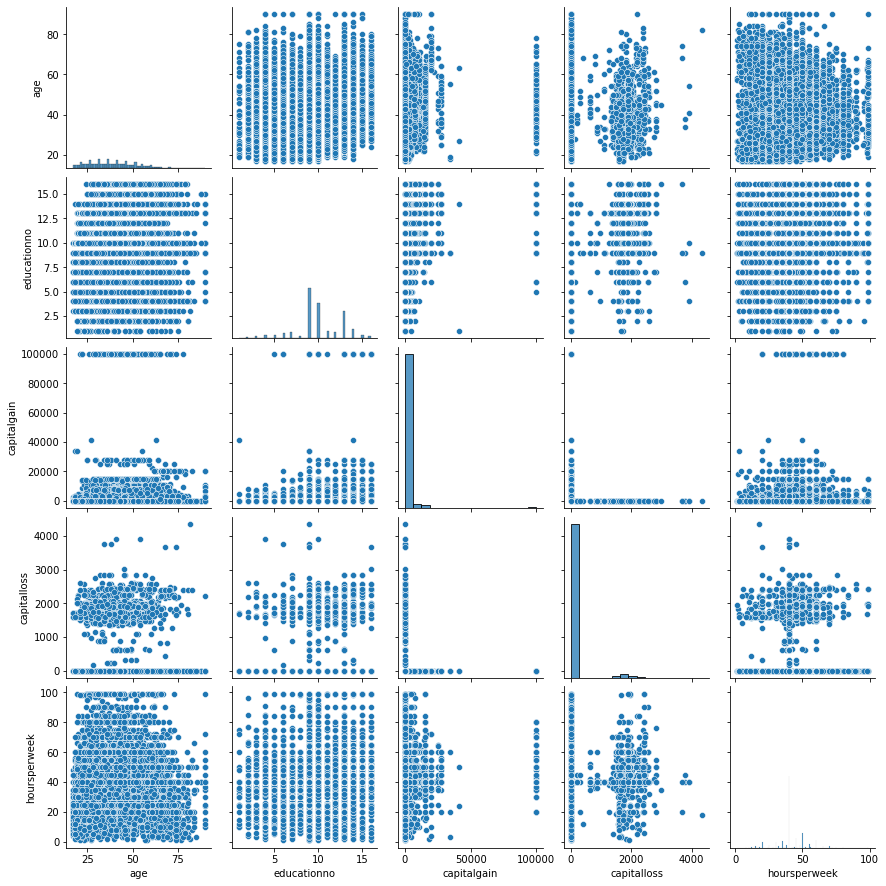

In [10]:
sns.pairplot(salary_train)
# NO relation seeing between features.



                   age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.038048     0.077235     0.052684      0.072529
educationno   0.038048     1.000000     0.126085     0.080025      0.145491
capitalgain   0.077235     0.126085     1.000000    -0.036023      0.079403
capitalloss   0.052684     0.080025    -0.036023     1.000000      0.049093
hoursperweek  0.072529     0.145491     0.079403     0.049093      1.000000


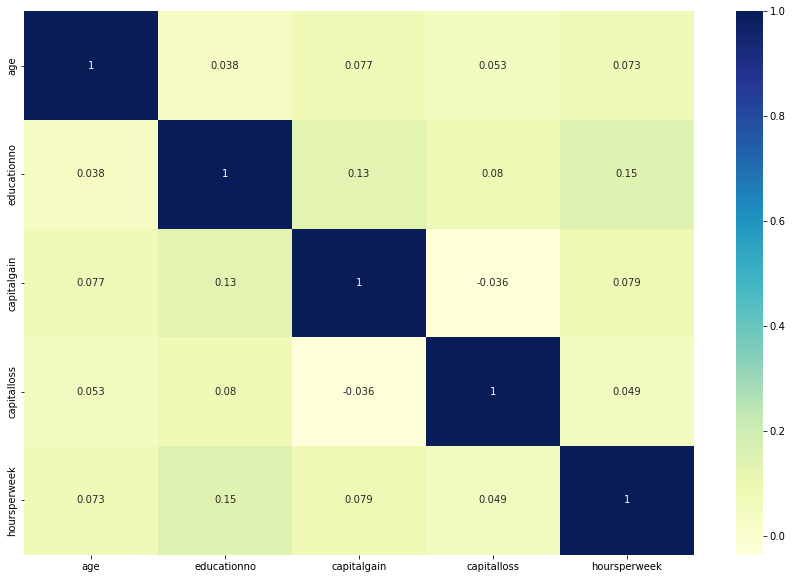

In [11]:
# increasing figure size:
plt.figure(figsize=(15,10))

print(salary_train.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(salary_train.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()


In [12]:
# Feature and Target devision:-

# feature:- X
X = salary_train.iloc[:,0:-1]

# Target:- Y
Y = salary_train.iloc[:,-1]

#show
print(X.shape)
X.head(1)


(26903, 13)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States


In [13]:
# Encoading features:-

X_en = pd.get_dummies(X)

print(X.info())
X_en.sample(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  object
 2   education      26903 non-null  object
 3   educationno    26903 non-null  int64 
 4   maritalstatus  26903 non-null  object
 5   occupation     26903 non-null  object
 6   relationship   26903 non-null  object
 7   race           26903 non-null  object
 8   sex            26903 non-null  object
 9   capitalgain    26903 non-null  int64 
 10  capitalloss    26903 non-null  int64 
 11  hoursperweek   26903 non-null  int64 
 12  native         26903 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.9+ MB
None


,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
4528,46,10,15024,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
25994,32,9,0,1672,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15993,34,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9612,52,9,0,0,44,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4118,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# Encoading Target:-

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y)


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Object:-
mm = MinMaxScaler()

X_train = pd.DataFrame(mm.fit_transform(X_en))
X_train.sample(10)


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
11083,0.534247,0.600000,0.0,0.000000,0.602041,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25187,0.616438,0.666667,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10973,0.643836,0.200000,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23893,0.452055,0.933333,0.0,0.554408,0.295918,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13327,0.068493,0.666667,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16130,0.328767,0.400000,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26504,0.041096,0.600000,0.0,0.000000,0.295918,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18980,0.438356,0.200000,0.0,0.000000,0.346939,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20246,0.369863,0.600000,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2651,0.534247,0.533333,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model Training:-
1.)
By using Gaussian Naive bayes:-

In [16]:
# Train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# Object Making:-
gnb = GaussianNB()

#fit the Mode:-
gnb.fit(X_train,Y_train)



GaussianNB()

# 
Predict the Result:

In [17]:
# EDA:-

print(salary_test.isnull().sum())

print("Duplicates"," ",salary_test.duplicated().sum())


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64
Duplicates   930


In [18]:
salary_test.drop_duplicates(inplace= True)


In [19]:
# Feature and Target:-

X = salary_test.iloc[:,0:-1] # feature
Y = salary_test.iloc[:,-1]   # target


In [20]:
# Encoading:-

X = pd.get_dummies(X)
Y_test = le.fit_transform(Y)


In [21]:
# Scaling:-

X_test = mm.fit_transform(X)



In [22]:
# prediction:-

Y_pred = gnb.predict(X_test)

Y_pred


array([0, 1, 1, ..., 1, 0, 1])

In [23]:
from sklearn.metrics import accuracy_score

print("Model Accuray Score:","  ",accuracy_score(Y_test,Y_pred))


     

Model Accuray Score:    0.5669497523000707


In [24]:
Y_pred_train = gnb.predict(X_train)

Y_pred_train



array([1, 1, 0, ..., 1, 0, 1])

In [25]:
# Accuracy:-

print("Training-set Accuracy","  ",accuracy_score(Y_train,Y_pred_train))



Training-set Accuracy    0.5765156302271122


In [26]:
# Printing the scores on training set and testing set:-

print("Test set Score:","  ",accuracy_score(Y_test,Y_pred))

print("Training-set Score","  ",accuracy_score(Y_train,Y_pred_train))



Test set Score:    0.5669497523000707
Training-set Score    0.5765156302271122


In [27]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_train,Y_train)

Y_pred_mnb = mnb.predict(X_test)

Y_pred_mnb

array([0, 0, 1, ..., 1, 0, 1])

In [28]:
print("Model Accuray Score:","  ",accuracy_score(Y_test,Y_pred_mnb))


Model Accuray Score:    0.7949044585987262


# Conclusion:-
MultinominalNB model perform better than Gaussian Naive bayes.